In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [109]:
df = pd.read_csv('breast-cancer-wisconsin.data',sep=',',names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                                                              'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                                                              'Normal Nucleoli','Mitoses','Class'])

In [65]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# EDA

### Info & Describe 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [69]:
(df['Bare Nuclei']=='?').sum()

16

In [71]:
df['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [111]:
df['Bare Nuclei']=df['Bare Nuclei'].replace('?',np.nan)

In [113]:
df['Bare Nuclei'].isna().sum()

16

In [115]:
df_clean=df[['Bare Nuclei']].dropna()
df_clean= df_clean.astype('int')
df_clean.describe()

,Bare Nuclei
count,683.000000
mean,3.544656
std,3.643857
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,10.000000


### Replce NAN with Mean

In [117]:
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df_clean['Bare Nuclei'].mean())

In [119]:
df['Bare Nuclei'].isna().sum()

0

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [121]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int32
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 57.5 KB


### Duplicated

In [123]:
df.duplicated().sum()

8

In [137]:
df.drop_duplicates(inplace=True)

<Axes: >

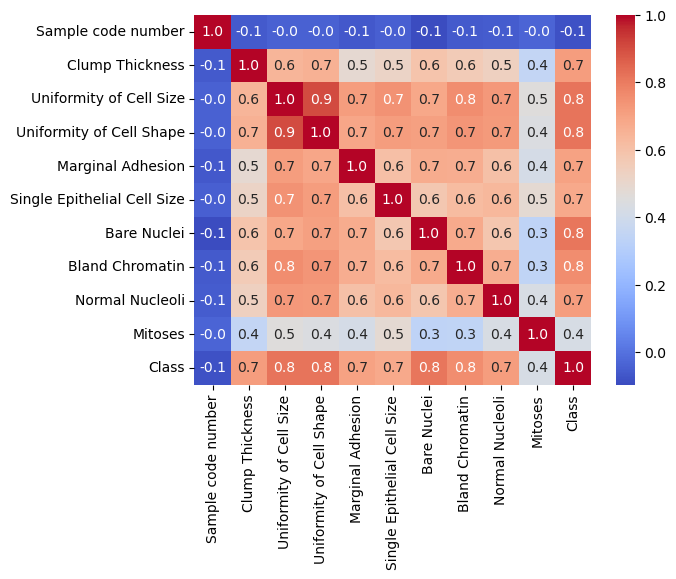

In [135]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='0.1f')

### Droping Correlated Columns 

In [140]:
df=df.drop(columns=['Sample code number','Uniformity of Cell Size'],axis=1)

<Axes: >

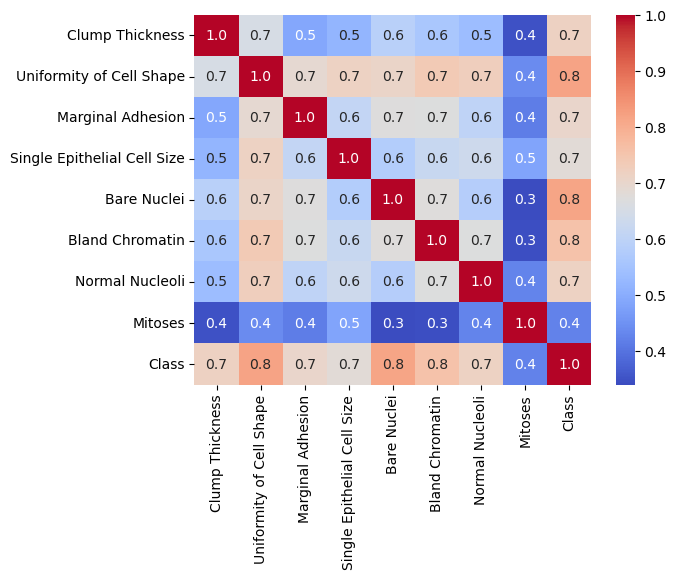

In [142]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='0.1f')

# SVM Model

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm  import SVC

In [151]:
feature = df.drop('Class',axis=1)
label = df['Class'].copy()

In [153]:
x_train,x_test,y_train,y_test = train_test_split(feature,label,random_state=44,shuffle=True)

In [177]:
SVM_model = SVC (kernel='poly')

In [179]:
SVM_model.fit(x_train,y_train)

SVC(kernel='poly')

In [181]:
print(classification_report(y_test,SVM_model.predict(x_test)))

              precision    recall  f1-score   support

           2       0.99      0.96      0.98       111
           4       0.94      0.98      0.96        62

    accuracy                           0.97       173
   macro avg       0.96      0.97      0.97       173
weighted avg       0.97      0.97      0.97       173

